<a href="https://colab.research.google.com/github/amshweta25/IMDBAnalysis/blob/main/COVID_19EarlyCaseTrend_ShwetaAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4212 non-null   int64  
 1   sex               318 non-null    object 
 2   birth_year        292 non-null    float64
 3   country           4212 non-null   object 
 4   region            305 non-null    object 
 5   group             76 non-null     object 
 6   infection_reason  130 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       62 non-null     float64
 9   contact_number    32 non-null     float64
 10  confirmed_date    4212 non-null   object 
 11  released_date     28 non-null     object 
 12  deceased_date     13 non-null     object 
 13  state             4212 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 460.8+ KB


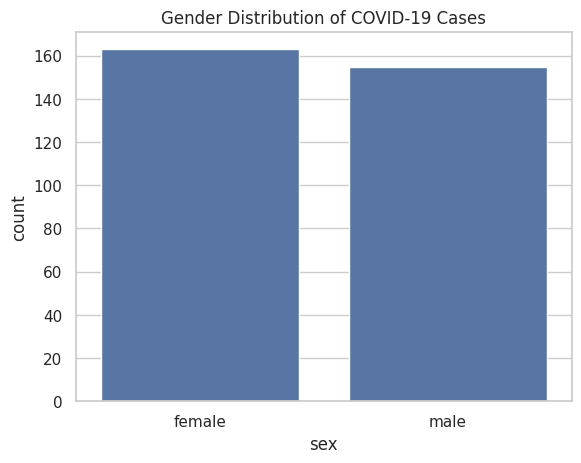

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

sns.set(style="whitegrid")

df = pd.read_csv("PatientInfo.csv")
df.head()
df.shape
df.info()
df.describe(include="all")

df.isnull().sum()

date_cols = ['confirmed_date', 'released_date', 'deceased_date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df['age'] = 2020 - df['birth_year']

df['recovery_days'] = (df['released_date'] - df['confirmed_date']).dt.days

recovered_df = df[df['state'] == 'released']

sns.countplot(data=df, x='sex')
plt.title("Gender Distribution of COVID-19 Cases")
plt.show()

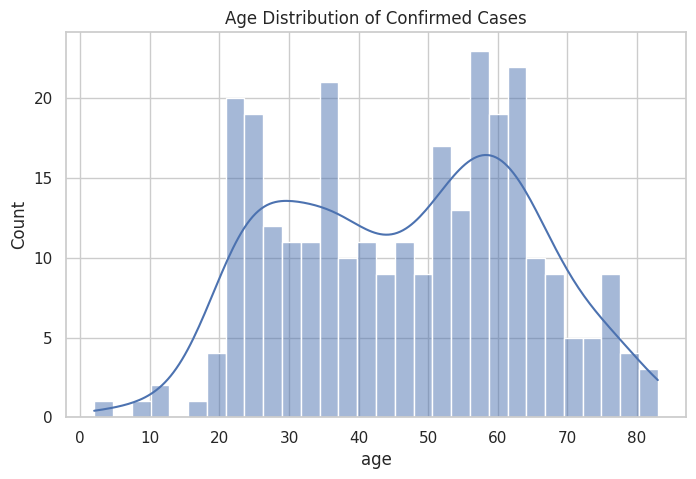

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Confirmed Cases")
plt.show()


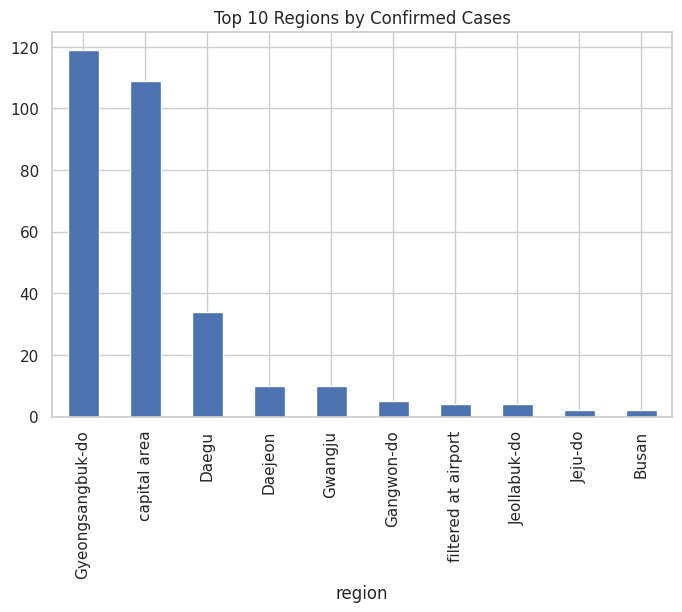

In [ ]:
df['region'].value_counts().head(10).plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Regions by Confirmed Cases")
plt.show()


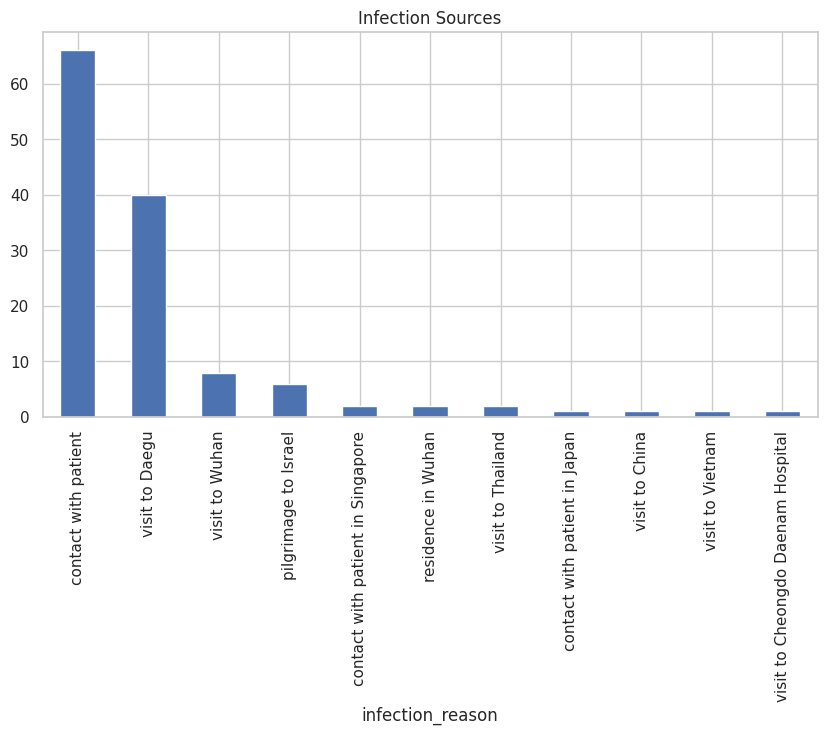

In [ ]:
plt.figure(figsize=(10,5))
df['infection_reason'].value_counts().plot(kind='bar')
plt.title("Infection Sources")
plt.show()

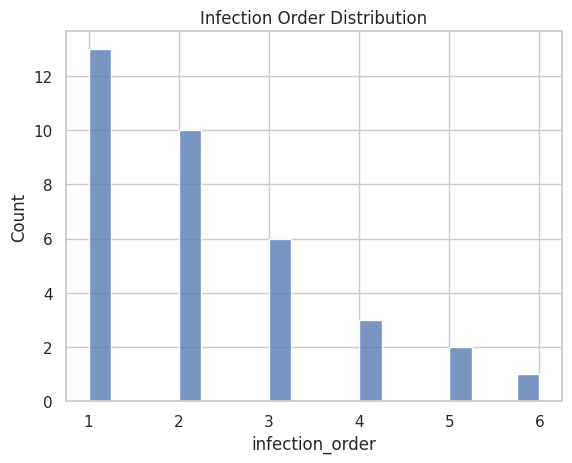

In [ ]:
sns.histplot(df['infection_order'], bins=20)
plt.title("Infection Order Distribution")
plt.show()


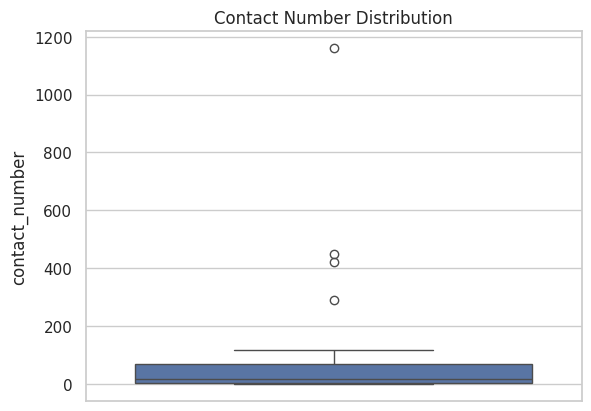

In [ ]:
sns.boxplot(data=df, y='contact_number')
plt.title("Contact Number Distribution")
plt.show()

In [ ]:
recovered_df['recovery_days'].describe()

,recovery_days
count,28.000000
mean,15.107143
std,5.626256
min,7.000000
25%,9.750000
50%,16.000000
75%,19.250000
max,24.000000


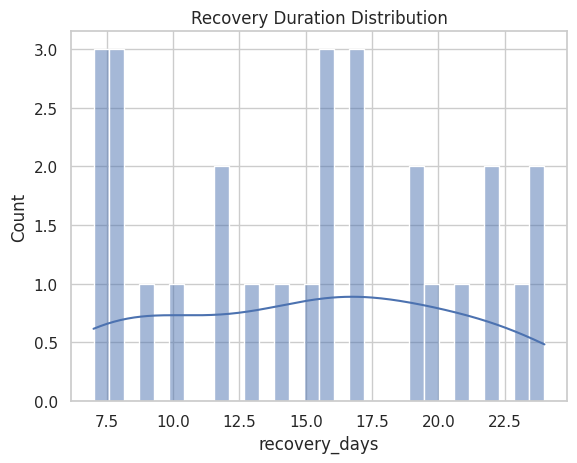

In [ ]:
sns.histplot(recovered_df['recovery_days'], bins=30, kde=True)
plt.title("Recovery Duration Distribution")
plt.show()

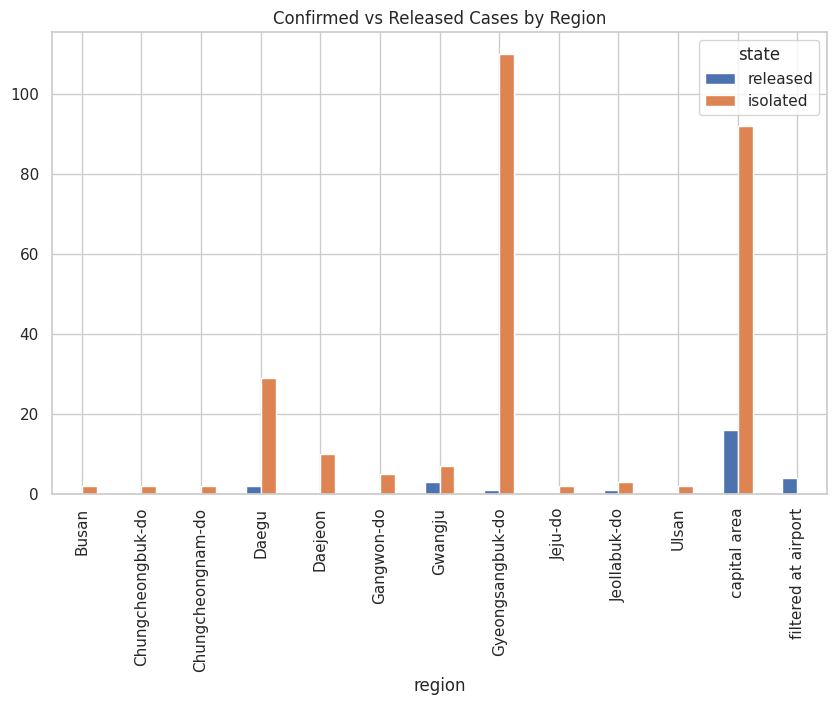

In [ ]:
region_summary = df.groupby('region')['state'].value_counts().unstack().fillna(0)

region_summary[['released', 'isolated']].plot(kind='bar', figsize=(10,6))
plt.title("Confirmed vs Released Cases by Region")
plt.show()

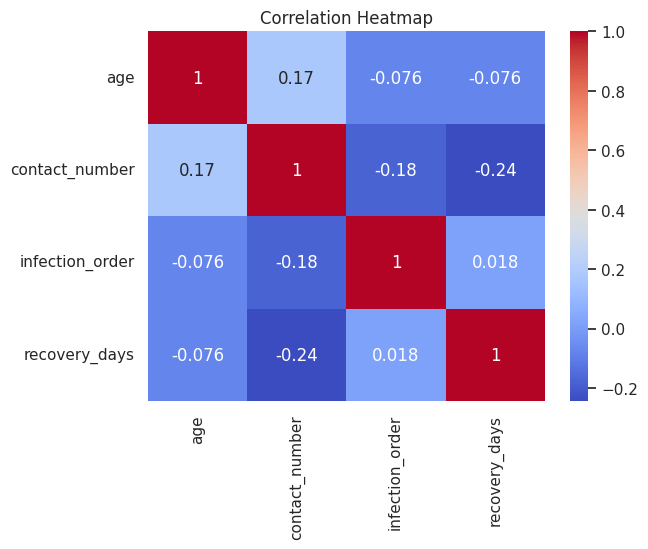

In [ ]:
recovered_df[['age', 'contact_number', 'infection_order', 'recovery_days']].corr()
sns.heatmap(
    recovered_df[['age','contact_number','infection_order','recovery_days']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
X = recovered_df[['age', 'contact_number', 'infection_order']].fillna(0)
y = recovered_df['recovery_days']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coeff_df

,Feature,Coefficient
0,age,0.067215
1,contact_number,-0.003285
2,infection_order,3.808888
